In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

In [2]:
sns.set_style("ticks")
cmap = plt.get_cmap('viridis')

In [3]:
df = pd.read_csv('trackers_clean.csv')
df.head()

,W_NAME,T_URL,T_CAT,Avg_Daily_Visitors,Avg_Daily_Pageviews,country
0,esheeq.com,Not Applicable,Not Applicable,5559978.41,30346942.08,Jordan
1,adfries.net,Not Applicable,Not Applicable,986325.00,1804976.00,Gabon
2,demotrader.org,Not Applicable,Not Applicable,5559978.41,30346942.08,Global
3,banesconline.com,Not Applicable,Not Applicable,625889.00,4256052.00,Venezuela
4,bankmellat.ir,Not Applicable,Not Applicable,886035.00,5014962.00,Iran


In [4]:
df['country'].fillna(value = 'Other', inplace = True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3251 entries, 0 to 3250
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   W_NAME               3251 non-null   object 
 1   T_URL                3251 non-null   object 
 2   T_CAT                3251 non-null   object 
 3   Avg_Daily_Visitors   3251 non-null   float64
 4   Avg_Daily_Pageviews  3251 non-null   float64
 5   country              3251 non-null   object 
dtypes: float64(2), object(4)
memory usage: 152.5+ KB


In [6]:
df.describe()

,Avg_Daily_Visitors,Avg_Daily_Pageviews
count,3.251000e+03,3.251000e+03
mean,5.561488e+06,3.035604e+07
std,2.278682e+07,1.387052e+08
min,5.011230e+05,6.871210e+05
25%,8.355545e+05,2.681825e+06
50%,1.636831e+06,6.768660e+06
75%,5.559978e+06,2.746435e+07
max,5.150074e+08,4.192160e+09


In [7]:
total_websites = df['W_NAME'].unique()
len(total_websites)

585

In [8]:
total_trackers = df['T_URL'].unique()
len(total_trackers)

826

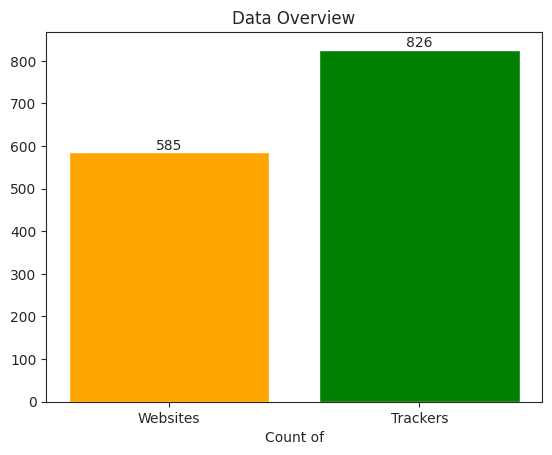

In [9]:
count_dict = {
     'Websites' : len(total_websites),
     'Trackers' : len(total_trackers)
}
plt.bar(count_dict.keys(), count_dict.values(), color = ['orange', 'green'])
for i, v in enumerate(count_dict.values()):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.xlabel('Count of')
plt.title('Data Overview')
plt.show()

In [10]:
df['T_URL'] = df['T_URL'].replace('Not Applicable', np.nan)
unique_count = df.groupby('W_NAME')['T_URL'].nunique().fillna(0)
df['tracker_count'] = df['W_NAME'].map(unique_count)
df.head()

,W_NAME,T_URL,T_CAT,Avg_Daily_Visitors,Avg_Daily_Pageviews,country,tracker_count
0,esheeq.com,NaN,Not Applicable,5559978.41,30346942.08,Jordan,0
1,adfries.net,NaN,Not Applicable,986325.00,1804976.00,Gabon,0
2,demotrader.org,NaN,Not Applicable,5559978.41,30346942.08,Global,0
3,banesconline.com,NaN,Not Applicable,625889.00,4256052.00,Venezuela,0
4,bankmellat.ir,NaN,Not Applicable,886035.00,5014962.00,Iran,0


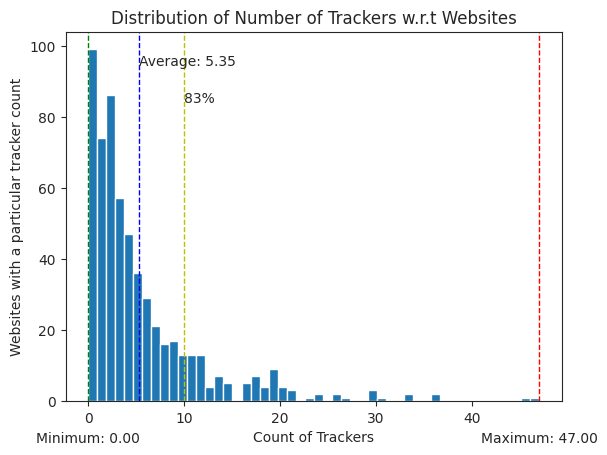

,W_NAME,T_URL
0,01net.com,36
1,11st.co.kr,3
2,139.99.213.47,2
3,163.com,1
4,1688.com,1
...,...,...
580,zf.fm,0
581,zillow.com,4
582,zingnews.vn,16
583,znanija.com,2


In [27]:
df_grp_trackers = pd.DataFrame(df.groupby('W_NAME')['T_URL'].nunique().fillna(0).reset_index())
min_val = np.min(df_grp_trackers['T_URL'])
max_val = np.max(df_grp_trackers['T_URL'])
avg_val = np.mean(df_grp_trackers['T_URL'])
q1, q2, q3 = np.percentile(df_grp_trackers['T_URL'], [25, 50, 83])

plt.hist(df_grp_trackers['T_URL'], bins = 50)
plt.xlabel('Count of Trackers')
plt.ylabel('Websites with a particular tracker count')
plt.title('Distribution of Number of Trackers w.r.t Websites')
plt.axvline(min_val, color='g', linestyle='dashed', linewidth=1)
plt.axvline(max_val, color='r', linestyle='dashed', linewidth=1)
plt.axvline(avg_val, color='b', linestyle='dashed', linewidth=1)
plt.axvline(q3, color='y', linestyle='dashed', linewidth=1)

plt.text(min_val, plt.xlim()[1]*-0.25, f'Minimum: {min_val:.2f}', ha='center', va='bottom')
plt.text(max_val, plt.xlim()[1]*-0.25, f'Maximum: {max_val:.2f}', ha='center', va='bottom')
plt.text(avg_val, plt.ylim()[1]*0.9, f'Average: {avg_val:.2f}', ha='left', va='bottom')
plt.text(q3, plt.ylim()[1]*0.8, '83%', ha='left', va='bottom')
plt.show()

display(df_grp_trackers)

1. On average, each website has 5 trackers embedded.

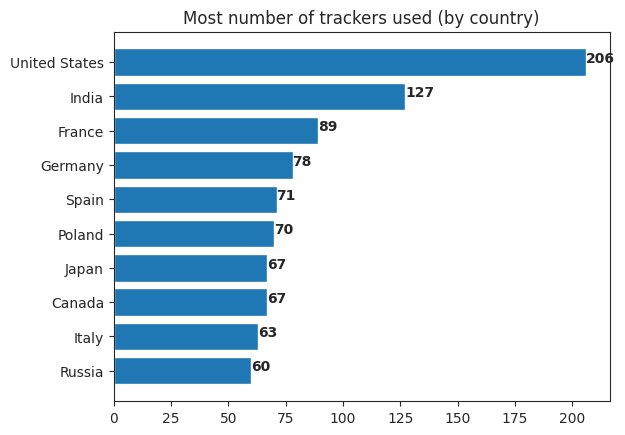

In [12]:
df_grp_trackers = pd.DataFrame(df.groupby(['country'])['T_URL'].nunique().reset_index().sort_values(by = 'T_URL', ascending = False))
df_grp_trackers_top10 = df_grp_trackers.iloc[0:10, :].sort_values(by = 'T_URL', ascending = True)
plt.barh(df_grp_trackers_top10['country'], df_grp_trackers_top10['T_URL'])
for i, v in enumerate(df_grp_trackers_top10['T_URL']):
    plt.text(v, i, str(v), fontweight='bold')

plt.title("Most number of trackers used (by country)")
plt.show()

1. From the labeled countries, Afghanistan uses the most unique trackers

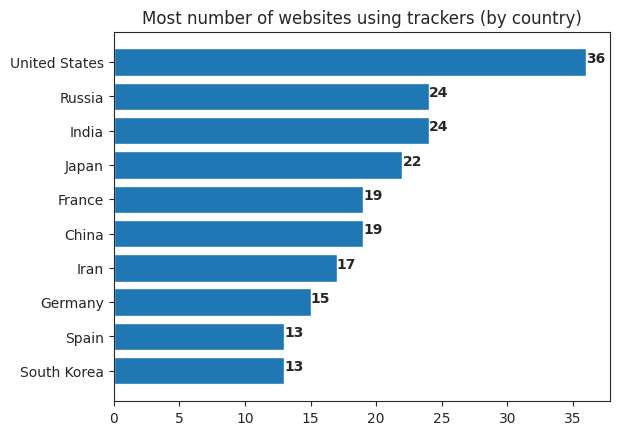

In [13]:
df_country_track = pd.DataFrame(df.groupby(['W_NAME', 'country'])['T_URL'].count().reset_index())
df_country_track['T_URL'] = df_country_track['T_URL'].replace(0, np.nan)
df_new_grp_country = pd.DataFrame(df_country_track.groupby('country')['T_URL'].count().reset_index().sort_values(by = 'T_URL', ascending = False))
total = sum(df_new_grp_country['T_URL'])
df_new_grp_country_top10 = df_new_grp_country.iloc[0: 10, :].sort_values(by = 'T_URL', ascending = True)

plt.barh(df_new_grp_country_top10['country'], df_new_grp_country_top10['T_URL'])
for i, v in enumerate(df_new_grp_country_top10['T_URL']):
    plt.text(v, i, str(v), fontweight='bold')

plt.title('Most number of websites using trackers (by country)')
plt.show()

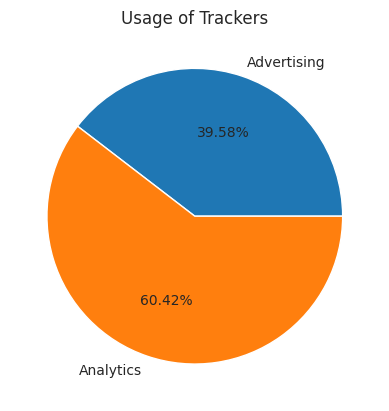

In [14]:
df_grp_cat_prep = pd.DataFrame(df.groupby(['W_NAME', 'T_CAT'])['T_URL'].count().reset_index())
df_grp_cat_prep['T_URL'] = df_grp_cat_prep['T_URL']
df_grp_cat = pd.DataFrame(df_grp_cat_prep.groupby('T_CAT')['T_URL'].count().reset_index().sort_values(by = 'T_URL', ascending = True))
df_grp_cat.drop(2, inplace =True)
plt.pie(df_grp_cat['T_URL'], labels=df_grp_cat['T_CAT'], autopct='%1.2f%%')
plt.title("Usage of Trackers")
plt.show()

In [15]:
# Compiling Tracker URL for labeling 

# df_grp_t_url = pd.DataFrame(df.groupby(['T_URL'])['tracker_count'].count().reset_index())
# df_grp_t_url['tracker_org'] = df_grp_t_url['T_URL'].apply(lambda x: x.split('.')[1])
# df_grp_t_url.to_csv('tracker_org.csv', index = False)

In [16]:
# combining the tracker organization data to the OG dataframe
df_tracker_org = pd.read_csv('tracker_org.csv')
df_tracker_org.head()

,T_URL,tracker_count,tracker_org
0,01net.com,1,01net
1,5ijo.01net.com,1,01net
2,securite.01net.com,2,01net
3,sync.1dmp.io,2,CleverDATA
4,pixel.33across.com,1,33Across


In [17]:
df['T_URL'] = df['T_URL'].replace(np.nan, 'Not Avbl')

def get_tracker_org(x):
  if x == 'Not Avbl':
    return np.nan
  else:
    return df_tracker_org.loc[df_tracker_org['T_URL'] == x, 'tracker_org'].values[0]

df['tracker_org'] = df['T_URL'].apply(get_tracker_org)
df['T_URL'] = df['T_URL'].replace('Not Avbl', np.nan)

In [18]:
# # saving the final tracker_csv

# df.to_csv('trackers_compiled.csv')

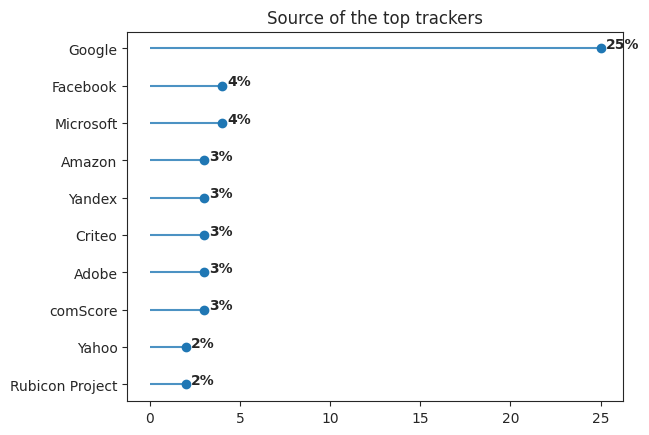

In [19]:
# Most frequent Tracker Overall
df_grp_tracker_org = pd.DataFrame(df.groupby(['tracker_org'])['T_URL'].count().reset_index().sort_values(by = 'T_URL', ascending = False))
df_grp_tracker_org_top_10 = df_grp_tracker_org.iloc[0:10, :].sort_values(by = 'T_URL', ascending = True)

total_trackers = sum(df_grp_tracker_org['T_URL'])
df_grp_tracker_org_top_10.loc[:, 'percentage'] = df_grp_tracker_org.loc[:, 'T_URL'].apply(lambda x: round((x/total_trackers)*100))

plt.hlines(y = df_grp_tracker_org_top_10['tracker_org'], xmin =0 ,xmax = df_grp_tracker_org_top_10['percentage'], alpha = 0.8)
plt.plot(df_grp_tracker_org_top_10['percentage'], df_grp_tracker_org_top_10['tracker_org'], "o")
for i, v in enumerate(df_grp_tracker_org_top_10['percentage']):
    plt.text(v + 0.3, i, str(v)+'%', fontweight='bold')

plt.title("Source of the top trackers")
plt.show()

In [20]:
# most frequent tracker by country
df_grp_trk_country = pd.DataFrame(df.groupby(['tracker_org', 'country'])['T_URL'].count().reset_index().sort_values(by = 'T_URL', ascending = True))

df_grp_trk_country_top_10 = df_grp_trk_country.iloc[0:10, :].sort_values(by = 'T_URL', ascending = True)
df_grp_trk_country_top_10

,tracker_org,country,T_URL
608,Mather Economics,Argentina,1
583,Knorex,Vietnam,1
584,LinkedIn,Angola,1
585,LinkedIn,France,1
586,LinkedIn,India,1
1021,TransUnion,United States,1
588,LiveChat,Global,1
589,LivePerson,United States,1
1020,TransUnion,India,1
591,LogMeIn,India,1


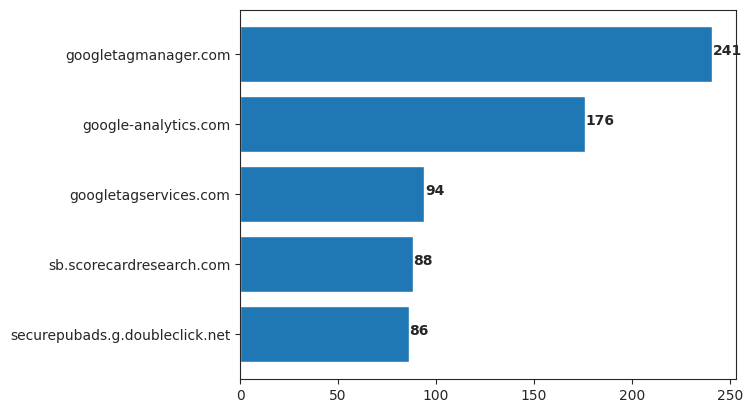

In [21]:
df_grp_T_URL = pd.DataFrame(df.groupby('T_URL')['tracker_count'].count().reset_index().sort_values(by = 'tracker_count', ascending = False))
df_grp_T_URL_top_5 = df_grp_T_URL.iloc[0:5, :].sort_values(by = 'tracker_count', ascending = True)
plt.barh(df_grp_T_URL_top_5['T_URL'], df_grp_T_URL_top_5['tracker_count'])

for i, v in enumerate(df_grp_T_URL_top_5['tracker_count']):
    plt.text(v + 0.3, i, str(v), fontweight='bold')

In [22]:
# Create a table from the dataframe
table = tabulate(df_grp_T_URL_top_5, headers=['Tracker', 'Count'], tablefmt='github')

# Print the table
print(table)

|     | Tracker                        |   Count |
|-----|--------------------------------|---------|
| 630 | securepubads.g.doubleclick.net |      86 |
| 609 | sb.scorecardresearch.com       |      88 |
| 332 | googletagservices.com          |      94 |
| 328 | google-analytics.com           |     176 |
| 331 | googletagmanager.com           |     241 |


In [23]:
df_grp_country = pd.DataFrame(df.groupby('country')['W_NAME'].nunique().reset_index().sort_values(by = 'W_NAME', ascending = False))
df_grp_country.iloc[0:10, :]

,country,W_NAME
99,United States,44
53,India,28
84,Russia,26
27,China,26
59,Japan,23
42,France,22
55,Iran,22
90,South Korea,16
4,Argentina,15
46,Germany,15


,country,T_URL,percentage
27,China,19,73.08
55,Iran,17,77.27
90,South Korea,13,81.25
99,United States,36,81.82
53,India,24,85.71
42,France,19,86.36
84,Russia,24,92.31
59,Japan,22,95.65
46,Germany,15,100.00
91,Spain,13,100.00


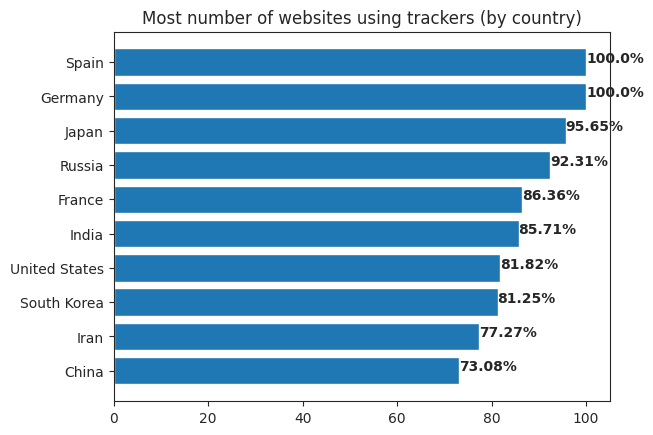

In [24]:
df_country_track = pd.DataFrame(df.groupby(['W_NAME', 'country'])['T_URL'].count().reset_index())
df_country_track['T_URL'] = df_country_track['T_URL'].replace(0, np.nan)
df_new_grp_country = pd.DataFrame(df_country_track.groupby('country')['T_URL'].count().reset_index().sort_values(by = 'T_URL', ascending = False))
total = sum(df_new_grp_country['T_URL'])


df_new_grp_country['percentage'] = df_new_grp_country['country'].apply(lambda x: round((df_new_grp_country[df_new_grp_country['country'] == x].values[0][1])/(df_grp_country[df_grp_country['country'] == x].values[0][1]) *100, 2) if df_grp_country[df_grp_country['country'] == x].values[0][1] > 0 else 0)
# df_new_grp_country = df_new_grp_country.sort_values(by = 'T_URL', ascending = False)
df_new_grp_country_top10 = df_new_grp_country.iloc[0: 10, :]
df_new_grp_country_top10 = df_new_grp_country_top10.sort_values(by = 'percentage', ascending = True)
display(df_new_grp_country_top10)

plt.barh(df_new_grp_country_top10['country'], df_new_grp_country_top10['percentage'])
for i, v in enumerate(df_new_grp_country_top10['percentage']):
    plt.text(v, i, str(v)+'%', fontweight='bold')

plt.title('Most number of websites using trackers (by country)')
plt.show()

In [25]:
df_new_grp_country['country']

99     United States
53             India
84            Russia
59             Japan
27             China
           ...      
95      Turkmenistan
29           Croatia
85       Saint Lucia
73           Myanmar
104         Zimbabwe
Name: country, Length: 105, dtype: object

In [26]:
# df.to_csv('final_data.csv')